# Linear Regression Models 
The linear function de X that minimizes the sum of squared residuals from Y.

## The assumptions about the validity of model are usually justified by assuming:
Linearity

Constant Error Variance

Normality of Distributions

Normal Errors 

No Multi-Collinearity

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.regressionplots import plot_partregress_grid
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [46]:
df01 = pd.read_csv("../data/dataset.csv")
df01.head()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM,ID
0,599.18,71.16,456.17,38.24,19.96,84.09,2299
1,495.12,70.62,498.28,30.94,16.21,74.10,2300
2,547.07,67.04,465.26,29.66,18.72,82.23,2301
3,375.74,68.99,564.05,34.00,19.54,81.52,2302
4,427.95,79.68,506.01,17.62,18.85,80.02,2303


In [47]:
df02 = df01[["ID","ILLUM","HUMID","CO2","SOUND","TEMP","RYTHM"]]

In [48]:
df02.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11728 entries, 0 to 11727
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      11728 non-null  int64  
 1   ILLUM   11728 non-null  float64
 2   HUMID   11728 non-null  float64
 3   CO2     11728 non-null  float64
 4   SOUND   11728 non-null  float64
 5   TEMP    11728 non-null  float64
 6   RYTHM   11728 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 641.5 KB


In [49]:
df02.isna().sum()

ID       0
ILLUM    0
HUMID    0
CO2      0
SOUND    0
TEMP     0
RYTHM    0
dtype: int64

In [50]:
len(df02["ID"].unique())

3200

In [51]:
df02.duplicated().any()

True

In [52]:
df02.shape

(11728, 7)

In [53]:
df03 = df02.drop_duplicates()

In [54]:
df03.shape

(3200, 7)

In [55]:
df03.loc[:,["ILLUM","HUMID","CO2","SOUND","TEMP"]].describe()

,ILLUM,HUMID,CO2,SOUND,TEMP
count,3200.000000,3200.000000,3200.000000,3200.000000,3200.000000
mean,439.163412,67.086106,501.620666,29.840194,20.042578
std,89.915142,4.776214,42.951183,6.158710,1.648479
min,145.480000,51.860000,352.820000,8.060000,14.760000
25%,377.060000,63.770000,471.427500,25.550000,18.920000
50%,437.375000,66.935000,502.350000,29.885000,20.050000
75%,500.792500,70.330000,530.142500,33.932500,21.180000
max,775.140000,83.900000,672.380000,53.780000,26.290000


Multi-collinearity occurs where the X variables are themselves related, in which two 
or more identified predictor variables in a multiple regression model are highly correlated.
The presence of this phenomenon can have a negative impact on the analysis.

R² may increase because the predictor is correlated with other predictor and that increases the 
variance of beta estimates. Thus, collinearity has a direct effect on the variance of the estimate.
It might happen that the explanatory variables are not linearly independent. This would occur, when 
two of the inputs were perfectly correlated.

In [56]:
#Correlations between variables 
df03.iloc[:,[1,2,3,4,5,6]].corr()

,ILLUM,HUMID,CO2,SOUND,TEMP,RYTHM
ILLUM,1.000000,0.043146,-0.161856,0.053017,-0.110735,0.044763
HUMID,0.043146,1.000000,0.180879,-0.279335,-0.156514,-0.023406
CO2,-0.161856,0.180879,1.000000,-0.055331,-0.056144,0.275289
SOUND,0.053017,-0.279335,-0.055331,1.000000,-0.047159,0.167734
TEMP,-0.110735,-0.156514,-0.056144,-0.047159,1.000000,0.249845
RYTHM,0.044763,-0.023406,0.275289,0.167734,0.249845,1.000000


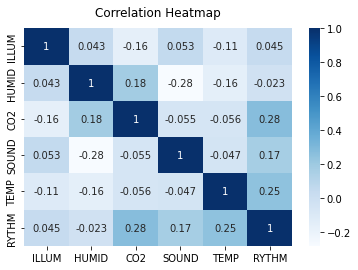

In [57]:
heatmap = sns.heatmap(df03.iloc[:,[1,2,3,4,5,6]].corr(), 
cmap="Blues", 
annot=True)
heatmap.set_title('Correlation Heatmap', 
fontdict={'fontsize':12}, 
pad=12)
plt.show()

### Variance Inflation Factors(VIF)
A maximum VIF greater than 10 is thought to signal harmful collinearty

Coefficients and standard erros of affected variables are unreliable

In [58]:
X = df03[["ILLUM","HUMID","CO2","SOUND","TEMP"]]
var_inflation_factor = pd.DataFrame()
var_inflation_factor["EXPLANATORY_VARIABLES"] = X.columns
var_inflation_factor["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(var_inflation_factor)                      

  EXPLANATORY_VARIABLES         VIF
0                 ILLUM   24.129336
1                 HUMID  140.327507
2                   CO2  120.699972
3                 SOUND   22.682024
4                  TEMP   92.892232


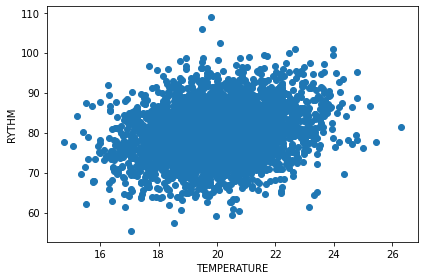

In [59]:
x1 = df03["TEMP"]
y = df03["RYTHM"]
plt.scatter(x1,y)
plt.xlabel("TEMPERATURE", fontsize = 10)
plt.ylabel("RYTHM", fontsize = 10)
plt.tight_layout()
plt.show()

In [60]:
stats.skew(df03["RYTHM"])

0.004691143116423096

In [61]:
kurtosis(df03["RYTHM"])

0.07479235846513088

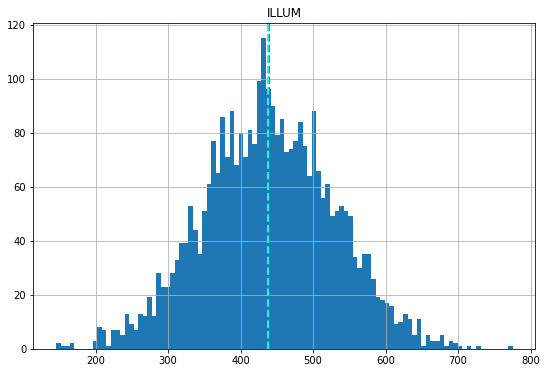

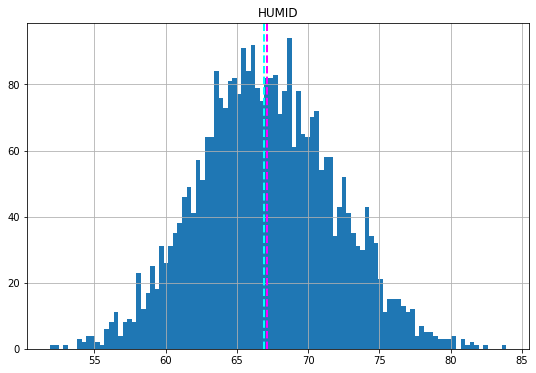

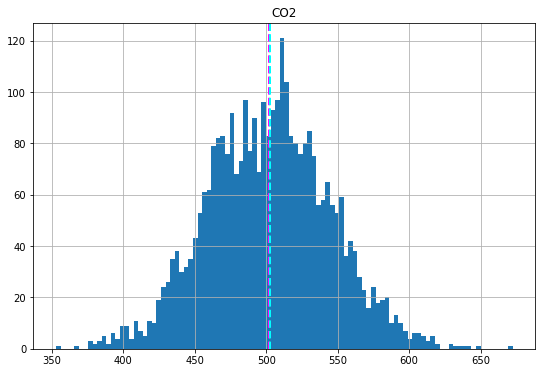

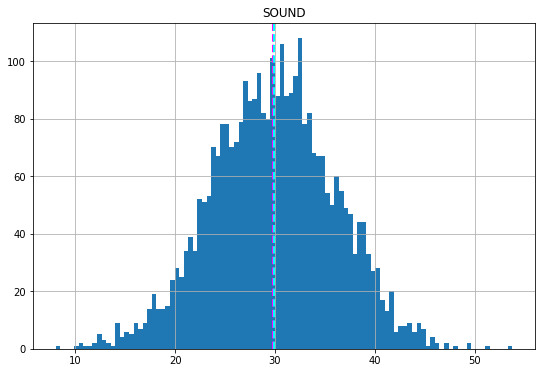

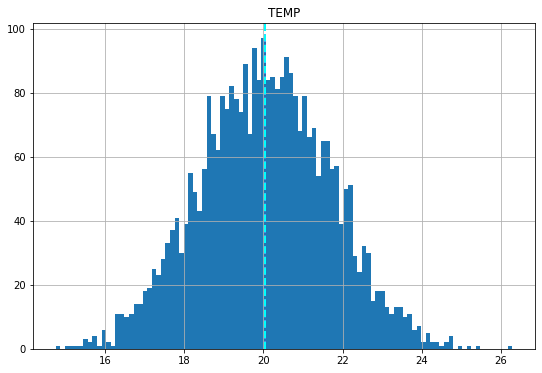

In [62]:
continuos_variables = ["ILLUM","HUMID","CO2","SOUND","TEMP"]

for col in continuos_variables:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df03[col]
    feature.hist(bins=100, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

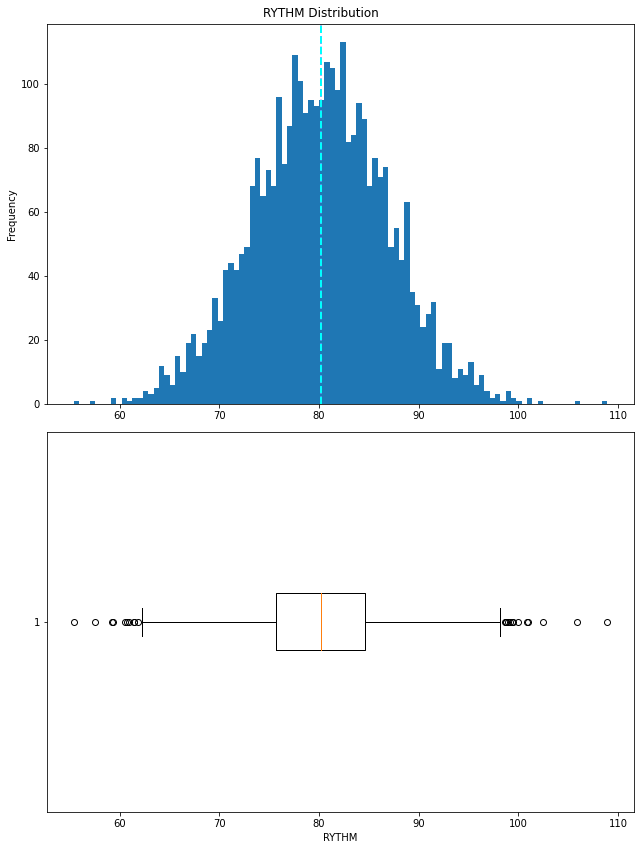

In [63]:
target = df03['RYTHM']
fig, ax = plt.subplots(2, 1, figsize = (9,12)) 
ax[0].hist(target, bins=100)
ax[0].set_ylabel('Frequency')
ax[0].axvline(target.mean(), color='magenta', linestyle='dashed', linewidth=2)
ax[0].axvline(target.median(), color='cyan', linestyle='dashed', linewidth=2)
ax[1].boxplot(target, vert=False)
ax[1].set_xlabel('RYTHM')
plt.suptitle('RYTHM Distribution')
plt.tight_layout()
plt.show()

### Multiple Linear Regression


In [64]:

model01 = smf.ols(formula = "RYTHM ~ ILLUM + CO2 + SOUND + TEMP + HUMID", data=df03).fit()

In [65]:
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RYTHM   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     158.5
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          7.44e-151
Time:                        10:26:50   Log-Likelihood:                -10299.
No. Observations:                3200   AIC:                         2.061e+04
Df Residuals:                    3194   BIC:                         2.065e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.2532      2.764      6.965      0.000      13.833      24.673
ILLUM          0.0088      0.001      7.255      0.000       0.006       0.011
CO2            0.0502      0.003     19.490      0.000       0.045       0.055
SOUND          0.2161      0.018     11.869      0.000       0.180       0.252
TEMP           1.1982      0.066     18.038      0.000       1.068       1.328
HUMID          0.0207      0.024      0.857      0.391      -0.027       0.068
==============================================================================
Omnibus:                        1.299   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.522   Jarque-Bera (JB):                1.229
Skew:                           0.036   Prob(JB):                        0.541
Kurtosis:                       3.064   Cond. No.                     1.74e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.74e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [66]:
print("Intercept:", model01.params[0], "Slope:", model01.params[1])

Intercept: 19.25320709259824 Slope: 0.008843269149688518


##### An important step in evaluating the quality of the model is to visualize the results

eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1
eval_env: 1


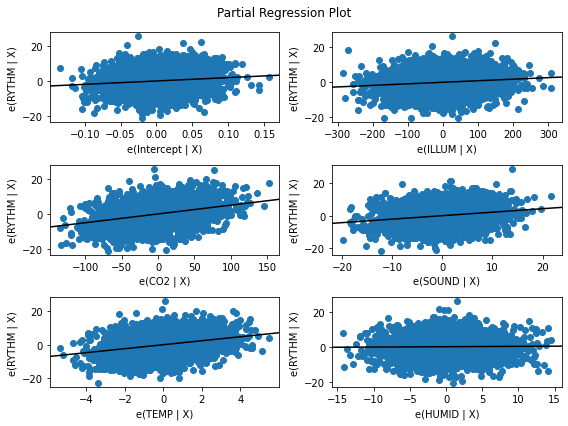

In [67]:
results = model01
fig = plt.figure(figsize=(8, 6))
plot_partregress_grid(results, fig=fig)
plt.tight_layout()
plt.show()

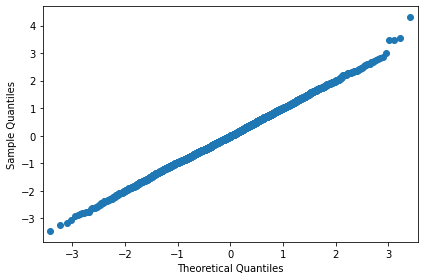

In [68]:
res = model01.resid # residuals
fig = sm.qqplot(res,dist=stats.norm, distargs=(3194,), fit=True)
plt.tight_layout()
plt.show()

#### We seek to find the best linear fit to the data

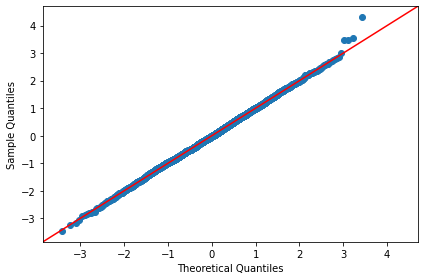

In [69]:
fig = sm.qqplot(res, dist=stats.norm,distargs=(3194,), fit=True, line="45")
plt.tight_layout()
plt.show()

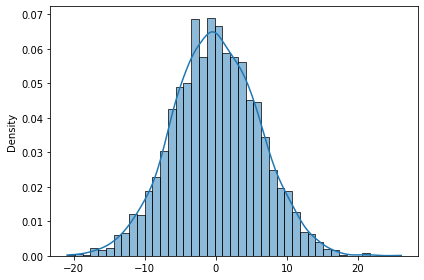

In [70]:
sns.histplot(res, stat="density", kde=True)
plt.tight_layout()
plt.show()


In [71]:
model02 = smf.ols(formula = "RYTHM ~ ILLUM + SOUND + TEMP + CO2", data=df03).fit()

In [72]:
model02.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RYTHM   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.198
Method:                 Least Squares   F-statistic:                     198.0
Date:                Fri, 17 Dec 2021   Prob (F-statistic):          7.16e-152
Time:                        10:26:53   Log-Likelihood:                -10299.
No. Observations:                3200   AIC:                         2.061e+04
Df Residuals:                    3195   BIC:                         2.064e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     20.7304      2.162      9.591      0.000      16.492      24.968
ILLUM          0.0089      0.001      7.335      0.000       0.007       0.011
SOUND          0.2116      0.017     12.138      0.000       0.177       0.246
TEMP           1.1890      0.066     18.137      0.000       1.060       1.318
CO2            0.0506      0.003     19.948      0.000       0.046       0.056
==============================================================================
Omnibus:                        1.302   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.521   Jarque-Bera (JB):                1.232
Skew:                           0.036   Prob(JB):                        0.540
Kurtosis:                       3.064   Cond. No.                     1.36e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.36e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [73]:
print("Intercept:", model02.params[0], "Slope:", model02.params[1])

Intercept: 20.73036081259306 Slope: 0.00891819742742404


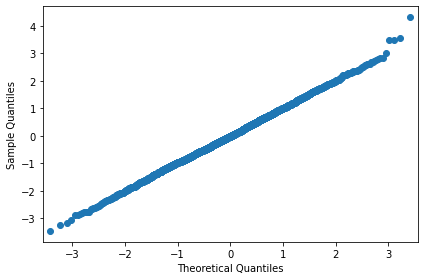

In [74]:
res02 = model02.resid # residuals
fig = sm.qqplot(res02, distargs=(3195,), fit=True)
plt.tight_layout()
plt.show()

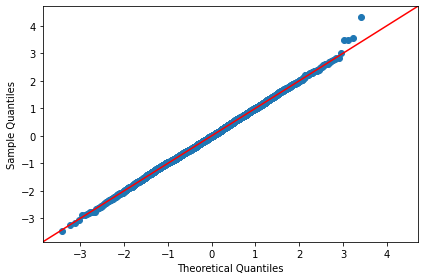

In [75]:
fig = sm.qqplot(res02, dist=stats.norm, distargs=(3195,), fit=True, line="45")
plt.tight_layout()
plt.show()

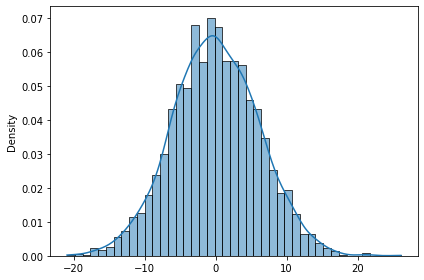

In [76]:
sns.histplot(res02, stat="density", kde=True)
plt.tight_layout()
plt.show()

In [77]:
model03 = smf.ols(formula = "RYTHM ~ ILLUM +  SOUND + TEMP", data=df03).fit()

In [78]:
model03.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RYTHM   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     116.9
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           8.22e-72
Time:                        10:26:55   Log-Likelihood:                -10487.
No. Observations:                3200   AIC:                         2.098e+04
Df Residuals:                    3196   BIC:                         2.101e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.4355      1.661     30.361      0.000      47.178      53.693
ILLUM          0.0049      0.001      3.829      0.000       0.002       0.007
SOUND          0.1940      0.018     10.506      0.000       0.158       0.230
TEMP           1.0875      0.069     15.692      0.000       0.952       1.223
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   2.043
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.520
Skew:                           0.009   Prob(JB):                        0.771
Kurtosis:                       3.060   Cond. No.                     6.59e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.59e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Generates a component and component-plus-residual (CCPR) plot against one regressor

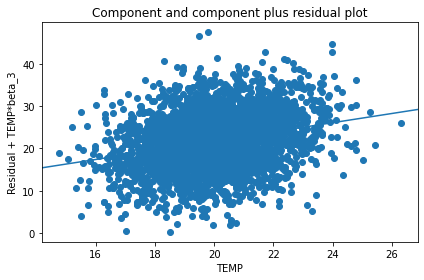

In [79]:
sm.graphics.plot_ccpr(model03, 'TEMP')
plt.tight_layout()
plt.show()

In [80]:
model04 = smf.ols(formula = "RYTHM ~ ILLUM + SOUND", data=df03).fit()

In [81]:
model04.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RYTHM   R-squared:                       0.029
Model:                            OLS   Adj. R-squared:                  0.029
Method:                 Least Squares   F-statistic:                     48.46
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           1.85e-21
Time:                        10:26:55   Log-Likelihood:                -10606.
No. Observations:                3200   AIC:                         2.122e+04
Df Residuals:                    3197   BIC:                         2.124e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     73.5416      0.798     92.167      0.000      71.977      75.106
ILLUM          0.0027      0.001      2.062      0.039       0.000       0.005
SOUND          0.1819      0.019      9.504      0.000       0.144       0.219
==============================================================================
Omnibus:                        0.138   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.933   Jarque-Bera (JB):                0.106
Skew:                           0.010   Prob(JB):                        0.948
Kurtosis:                       3.019   Cond. No.                     3.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### simple linear regression model

In [82]:
model05 = smf.ols(formula = "RYTHM ~ TEMP", data=df03).fit()

In [83]:
model05.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  RYTHM   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     212.9
Date:                Fri, 17 Dec 2021   Prob (F-statistic):           9.76e-47
Time:                        10:26:56   Log-Likelihood:                -10550.
No. Observations:                3200   AIC:                         2.110e+04
Df Residuals:                    3198   BIC:                         2.112e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6346      1.411     42.259      0.000      56.868      62.401
TEMP           1.0239      0.070     14.592      0.000       0.886       1.162
==============================================================================
Omnibus:                        1.941   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.379   Jarque-Bera (JB):                1.969
Skew:                           0.003   Prob(JB):                        0.374
Kurtosis:                       3.121   Cond. No.                         246.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
print("Intercept:", model05.params[0], "Slope:", model05.params[1])

Intercept: 59.634562996576946 Slope: 1.0239227957816945


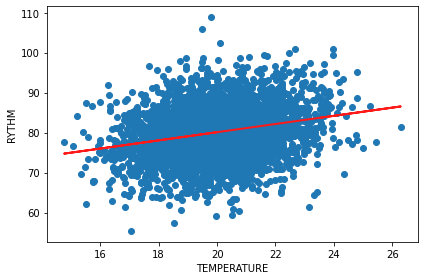

In [85]:
plt.scatter(x1,y)
yhat = 1.0239*x1 + 59.634562996576946
fig = plt.plot(x1,yhat, lw=2,c="#ff1a1a", label="regression line")
plt.xlabel("TEMPERATURE", fontsize = 10)
plt.ylabel("RYTHM", fontsize = 10)
plt.tight_layout()
plt.show()

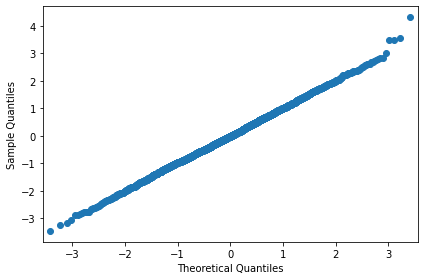

In [86]:
res05 = model05.resid # residuals
fig = sm.qqplot(res02, dist=stats.norm, distargs=(3196,), fit=True)
plt.tight_layout()
plt.show()

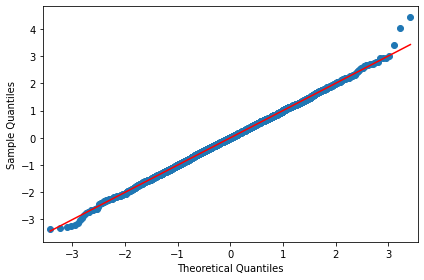

In [87]:
fig = sm.qqplot(res05, dist=stats.norm, distargs=(3196,), fit=True, line="r")
plt.tight_layout()
plt.show()

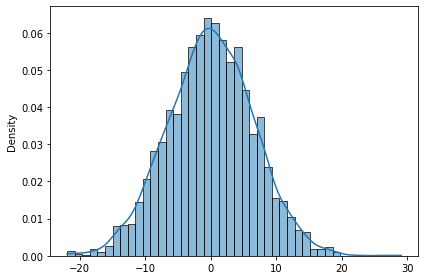

In [88]:
sns.histplot(res05, stat="density", kde=True)
plt.tight_layout()
plt.show()

Reference:

https://www.geeksforgeeks.org/detecting-multicollinearity-with-vif-python/